In [1]:
!pip install mediapipe
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

You should consider upgrading via the '/home/jhanvipatel/jupyter/environment/bin/python -m pip install --upgrade pip' command.
Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_conf

In [2]:
import cv2
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    cv2.imwrite('grayscale.jpg',img)
    return img

In [3]:
import cv2
import glob
import pandas as pd
import os 
c = 0
        
#angle lists
filename_list = []
Distance_shoulderList = []
Distance_kneeList = []
Distance_KneeshoulderList = []
rightKneeAngleList = []
rightHipAngleList = []
rightTrunkAngleList = []
rightShoulderAngleList = []
rightElbowAngleList = []
rightNeckAngleList = []
leftkneeAngleList = []
leftHipAngleList = []
leftTrunkAngleList = []
leftShoulderAngleList = []
leftElbowAngleList = []

Distance_WristKneeList = []
KNEE_list = []
rightHeelY_list = []
rightFootY_list = []
distancelist_RF=[]
distancelist_RH = []

#list for less scores
leftSHKAngleList = []
rightSHKAngleList = []
stancewidth_list = []
stancenarrow_list = []

left_footZ_LIST = []
right_footZ_LIST = []
#iterate all frames
for file in sorted(os.listdir('SIDE_frames')):
    print("filename:",file)
    filename_list.append(file)
    img = cv2.imread('SIDE_frames/'+ file)
    c = c + 1
    resize_and_show(img)
    detail_list = []
    # Run MediaPipe Pose and draw pose landmarks.
    with mp_pose.Pose(
        static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
        #image = cv2.imread('images/frame0.jpg')
        # Convert the BGR image to RGB and process it with MediaPipe Pose.
        results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # Print nose landmark.
        image_hight, image_width, _ = img.shape
        #extract keypoints
        nose_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width
        nose_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_width
        
        
        left_shoulderX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
        left_shoulderY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_hight
        right_shoulderX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
        right_shoulderY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_hight


        left_elbowX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * image_width
        left_elbowY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * image_hight
        right_elbowX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x * image_width
        right_elbowY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y * image_hight

        left_wristX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x * image_width
        left_wristY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y * image_hight
        right_wristX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x * image_width
        right_wristY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y * image_hight
 

        left_pinkyX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_PINKY].x * image_width
        left_pinkyY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_PINKY].y * image_hight
        right_pinkyX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_PINKY].x * image_width
        right_pinkyY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_PINKY].y * image_hight
  
        left_indexX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX].x * image_width
        left_indexY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_INDEX].y * image_hight
        right_indexX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX].x * image_width
        right_indexY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_INDEX].y * image_hight
   
        left_thumbX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_THUMB].x * image_width
        left_thumbY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_THUMB].y * image_hight
        right_thumbX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_THUMB].x * image_width
        right_thumbY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_THUMB].y * image_hight
        
        left_hipX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * image_width
        left_hipY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * image_hight
        right_hipX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * image_width
        right_hipY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * image_hight
       
        left_kneeX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * image_width
        left_kneeY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * image_hight
        right_kneeX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x * image_width
        right_kneeY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y * image_hight
        
        left_ankleX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * image_width
        left_ankleY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * image_hight
        right_ankleX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x * image_width
        right_ankleY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y * image_hight
        
        left_heelX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * image_width
        left_heelY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * image_hight
        right_heelX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * image_width
        right_heelY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * image_hight
        
        left_footX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * image_width
        left_footY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * image_hight
        right_footX = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x * image_width
        right_footY = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y * image_hight
        
        left_footZ = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].z
        right_footZ = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].z
                       
        
        left_footZ_LIST.append(left_footZ)
        right_footZ_LIST.append(right_footZ)

        #print all the keypoints fetched
        print("left_footZ: ",left_footZ, "right_footZ: ",right_footZ)
        
        print("L_ankle:",left_ankleX , left_ankleY , "R_ankle: ",right_ankleX ,right_ankleY)
        print("L_heel:",left_heelX , left_heelY , "R_heel: ",right_heelX ,right_heelY)
        print("L_foot:",left_footX , left_footY , "R_foot: ",right_footX ,right_footY)
        
        right_foot = [right_footX,right_footY]
        right_heel = [right_heelX,right_heelY]
#         dis_RF = (math.dist(right_footX,right_footY))
#         dis_RH = (math.dist(right_heelX,right_heelY))
        rightHeelY_list.append(right_heelY)
        rightFootY_list.append(right_footY)
        distancelist_RF.append(right_foot)
        distancelist_RH.append(right_heel)

        #calculate distances required
        left_shoulder = [left_shoulderX,left_shoulderY]
        right_shoulder = [right_shoulderX,right_shoulderY]
        dis_LSRS = (math.dist(left_shoulder,right_shoulder))
        print("Distance_shoulder::", dis_LSRS)
        shoulder_center = dis_LSRS/2
        left_knee = [left_kneeX,left_kneeY]
        right_knee = [right_kneeX,right_kneeY]
        dis_LKRK = (math.dist(left_knee,right_knee))
        print("Distance_knee::", dis_LKRK)
        distance_kneeShoulder = dis_LKRK/dis_LSRS 
        print("Distance_Kneeshoulder::", distance_kneeShoulder)
        
        right_wrist = [right_wristX,right_wristY]
        distance_wristknee = (math.dist(right_knee,right_wrist))
        print("Distance_Wrist_Knee::", distance_wristknee)
        
        left_foot = [left_footX,left_footY]
        right_foot = [right_footX,right_footY]
        dis_foot = math.dist(left_foot,right_foot)
        print("Distance_foot::", dis_foot)

        if(dis_foot > dis_LSRS):
            Stance_width = dis_foot - dis_LSRS
            print("Stance_width::",Stance_width)
            stancewidth_list.append(Stance_width)
        else:
            stancewidth_list.append("None")
  

        if(dis_LSRS > dis_foot):
            Stance_narrow = dis_LSRS - dis_foot
            print("Stance_narrow:",Stance_narrow)
            stancenarrow_list.append(Stance_narrow)
        else:
            stancenarrow_list.append("None")


        #append the distances
        Distance_shoulderList.append(dis_LSRS)
        Distance_kneeList.append(dis_LKRK)
        Distance_KneeshoulderList.append(distance_kneeShoulder)
        Distance_WristKneeList.append(distance_wristknee)
        
        
        #angle calculus 
        def CalculateAngle(kp1,kp2,kp3,kp4,kp5,kp6):
            a = np.array([kp1, kp2])
            b = np.array([kp3, kp4])
            c = np.array([kp5, kp6])
            ba = a - b
            bc = c - b
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle = np.arccos(cosine_angle)
            return np.degrees(angle)

        def angleforShoulder(p1,p2,p5,p6,sp):
            a1 = np.array([p1,p2])
            b1 = np.array([p5,p6])
            c1 = np.array([sp])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)

        def calculateTrunkangle(p1,p2,sp,p5,p6):
            a1 = np.array([p1,p2])
            b1 = np.array([sp])
            c1 = np.array([p5,p6])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)

        def calculateHipangle(sp,p1,p2,p5,p6):
            a1 = np.array([sp])
            b1 = np.array([p1,p2])
            c1 = np.array([p5,p6])
            ba = a1 - b1
            bc = c1 - b1
            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle1 = np.arccos(cosine_angle)
            return np.degrees(angle1)


        rightKneeAngle = CalculateAngle(right_hipX,right_hipY,right_kneeX,right_kneeY,right_footX,right_footY)
        print("rightKneeAngle:::: ",rightKneeAngle)
        rightKneeAngleList.append(rightKneeAngle)
        
        rightHipAngle = angleforShoulder(right_kneeX,right_kneeY,right_hipX,right_hipY,shoulder_center)
        print("rightHipAngle:",rightHipAngle)
        rightHipAngleList.append(rightHipAngle)

        rightTrunkAngle = calculateTrunkangle(right_shoulderX,right_shoulderY,shoulder_center,right_hipX,right_hipY)
        print("rightTrunkAngle",rightTrunkAngle)
        rightTrunkAngleList.append(rightTrunkAngle)
        
        rightShoulderAngle = angleforShoulder(right_elbowX,right_elbowY,right_shoulderX,right_shoulderY,shoulder_center)
        print("rightShoulderAngle",rightShoulderAngle)
        rightShoulderAngleList.append(rightShoulderAngle)
        
        rightElbowAngle = CalculateAngle(right_ankleX,right_ankleY,right_elbowX,right_elbowY,right_shoulderX,right_shoulderY)
        print("rightElbowAngle",rightElbowAngle)
        rightElbowAngleList.append(rightElbowAngle)
        
        rightNeckAngle = calculateTrunkangle(right_shoulderX,right_shoulderY,shoulder_center,nose_x,nose_y)
        print("rightNeckAngle",rightNeckAngle)
        rightNeckAngleList.append(rightNeckAngle)

        leftkneeAngle = CalculateAngle(left_hipX,left_hipY,left_kneeX,left_kneeY,left_footX,left_footY)
        print("leftkneeAngle:::: ",leftkneeAngle)
        leftkneeAngleList.append(leftkneeAngle)
        
        leftHipAngle = angleforShoulder(left_kneeX,left_kneeY,left_hipX,left_hipY,shoulder_center)
        print("leftHipAngle:",leftHipAngle)
        leftHipAngleList.append(leftHipAngle)

        leftTrunkAngle = calculateTrunkangle(left_shoulderX,left_shoulderY,shoulder_center,left_hipX,left_hipY)
        print("leftTrunkAngle:",leftTrunkAngle)
        leftTrunkAngleList.append(leftTrunkAngle)

        leftShoulderAngle = angleforShoulder(left_elbowX,left_elbowY,left_shoulderX,left_shoulderY,shoulder_center)
        print("leftShoulderAngle",leftShoulderAngle)
        leftShoulderAngleList.append(leftShoulderAngle)

        leftElbowAngle = CalculateAngle(left_ankleX,left_ankleY,left_elbowX,left_elbowY,left_shoulderX,left_shoulderY)
        print("leftElbowAngle",leftElbowAngle)
        leftElbowAngleList.append(leftElbowAngle)
        
        #calculate less angle
        leftSHKAngle = CalculateAngle(left_shoulderX,left_shoulderY,left_hipX,left_hipY,left_kneeX,left_kneeY)
        print("leftSHKAngle:",leftSHKAngle)
        leftSHKAngleList.append(leftSHKAngle)
        
        rightSHKAngle = CalculateAngle(right_shoulderX,right_shoulderY,right_hipX,right_hipY,right_kneeX,right_kneeY)
        print("rightSHKAngle:",rightSHKAngle)
        rightSHKAngleList.append(rightSHKAngle)
        
        # Draw pose landmarks.
        print(f'Pose landmarks of {file}:')
        annotated_image = img.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        resize_and_show(annotated_image)
        print("---------------------------------------")
        
print("count:",c)
#create dictonary to save lists for angles & distance
data = {
    'image_name': filename_list,
    'rightHeel' : rightHeelY_list,
    'rightFoot' : rightFootY_list,
    'distancelist_RH': distancelist_RH,
    'distancelist_RF':distancelist_RF,
    'leftkneeAngle':leftkneeAngleList,
    'rightKneeAngle':rightKneeAngleList,
    'leftSHKAngle':leftSHKAngleList,
    'rightSHKAngle':rightSHKAngleList,
    'stance_width':stancewidth_list,
    'stance_narrow':stancenarrow_list,
    'left_footZ':left_footZ_LIST,
    'right_footZ':right_footZ_LIST
}
 
# Make data frame of above data
df = pd.DataFrame(data)
 
# append data frame to CSV file
# df.to_csv('dec19.csv', mode='a', index=False, header=False)
df.to_csv('newdatafile.csv', mode='a', index=False, header=False)

 
# print message
print("Data appended successfully.")

filename: 001.jpg


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


left_footZ:  0.20557519793510437 right_footZ:  -0.28572607040405273
L_ankle: 417.5878186225891 386.4888381958008 R_ankle:  415.47133350372314 397.776517868042
L_heel: 409.48499155044556 404.08281326293945 R_heel:  404.41487407684326 414.60256576538086
L_foot: 453.3058395385742 407.63671875 R_foot:  455.08056640625 421.2988471984863
Distance_shoulder:: 13.266159499648664
Distance_knee:: 4.2652312540689366
Distance_Kneeshoulder:: 0.32151213425271236
Distance_Wrist_Knee:: 78.02258691334897
Distance_foot:: 13.776915808619494
Stance_width:: 0.51075630897083
rightKneeAngle::::  173.8979944679891
rightHipAngle: 126.12523270824367
rightTrunkAngle 13.964312165163756
rightShoulderAngle 96.32050576983333
rightElbowAngle 172.35310660989708
rightNeckAngle 4.239542509867135
leftkneeAngle::::  164.57070556576716
leftHipAngle: 117.94093036674656
leftTrunkAngle: 13.011857112116862
leftShoulderAngle 100.84411392961398
leftElbowAngle 179.50274964665672
leftSHKAngle: 174.98840937147847
rightSHKAngle: 167.

left_footZ:  0.1522655189037323 right_footZ:  -0.21034760773181915
L_ankle: 417.6843843460083 386.7725944519043 R_ankle:  415.4051704406738 398.26151847839355
L_heel: 408.4983329772949 402.8617286682129 R_heel:  404.61179637908936 418.0027484893799
L_foot: 449.7208023071289 407.17912673950195 R_foot:  451.92591762542725 419.1834354400635
Distance_shoulder:: 13.547432465350157
Distance_knee:: 4.843661976674082
Distance_Kneeshoulder:: 0.3575335761268834
Distance_Wrist_Knee:: 82.0625948278531
Distance_foot:: 12.205161242088163
Stance_narrow: 1.342271223261994
rightKneeAngle::::  168.8971531021465
rightHipAngle: 119.94065488500019
rightTrunkAngle 13.796081665838862
rightShoulderAngle 100.44396641600709
rightElbowAngle 179.3468388389681
rightNeckAngle 3.7485341131662326
leftkneeAngle::::  163.80687180289328
leftHipAngle: 113.15001971017837
leftTrunkAngle: 12.781512257645362
leftShoulderAngle 99.15224939445
leftElbowAngle 179.67890997290667
leftSHKAngle: 179.94589678643646
rightSHKAngle: 174

left_footZ:  0.21007072925567627 right_footZ:  -0.16411355137825012
L_ankle: 417.6742753982544 384.16348457336426 R_ankle:  414.5948119163513 397.36650466918945
L_heel: 407.31899785995483 399.9986171722412 R_heel:  403.0170593261719 414.3318557739258
L_foot: 448.91800022125244 405.6752586364746 R_foot:  450.11191749572754 417.49242782592773
Distance_shoulder:: 14.310814104953355
Distance_knee:: 4.127002741909446
Distance_Kneeshoulder:: 0.2883835057630285
Distance_Wrist_Knee:: 97.97592749407075
Distance_foot:: 11.877328239568453
Stance_narrow: 2.4334858653849025
rightKneeAngle::::  163.2311962341651
rightHipAngle: 115.75430770775833
rightTrunkAngle 13.768798073198019
rightShoulderAngle 107.07696171570618
rightElbowAngle 171.80645097007343
rightNeckAngle 3.5110799410295965
leftkneeAngle::::  159.8773914393374
leftHipAngle: 111.53598069330835
leftTrunkAngle: 12.967126637329747
leftShoulderAngle 100.02117379262634
leftElbowAngle 178.3843522959928
leftSHKAngle: 179.90873386437963
rightSHKAn

left_footZ:  0.1773381531238556 right_footZ:  -0.1573045551776886
L_ankle: 418.6274480819702 388.2924556732178 R_ankle:  413.3598017692566 400.2552795410156
L_heel: 410.2319669723511 401.72481536865234 R_heel:  406.1739320755005 409.1038513183594
L_foot: 446.76241874694824 409.51815605163574 R_foot:  448.8339948654175 417.7353286743164
Distance_shoulder:: 8.6942583096289
Distance_knee:: 4.980959720825697
Distance_Kneeshoulder:: 0.5729022009053123
Distance_Wrist_Knee:: 92.69413593230509
Distance_foot:: 8.474275988280338
Stance_narrow: 0.21998232134856188
rightKneeAngle::::  175.46132384849008
rightHipAngle: 124.9350664520617
rightTrunkAngle 13.845868764595584
rightShoulderAngle 98.35613400790358
rightElbowAngle 179.60661295209766
rightNeckAngle 3.346688514335041
leftkneeAngle::::  172.65563924492892
leftHipAngle: 119.46688458919665
leftTrunkAngle: 12.949690206676925
leftShoulderAngle 96.70466683303385
leftElbowAngle 177.7016784438615
leftSHKAngle: 167.89660379704011
rightSHKAngle: 161.2

left_footZ:  0.17912127077579498 right_footZ:  -0.11676640808582306
L_ankle: 421.7228584289551 389.76353645324707 R_ankle:  416.12922382354736 398.81635665893555
L_heel: 407.2889995574951 402.9231262207031 R_heel:  401.0321168899536 415.26803970336914
L_foot: 453.37215423583984 409.58078384399414 R_foot:  451.3627986907959 419.5525074005127
Distance_shoulder:: 4.169628009932376
Distance_knee:: 4.0000376211168955
Distance_Kneeshoulder:: 0.9593272137438872
Distance_Wrist_Knee:: 124.59325942510826
Distance_foot:: 10.172157116070608
Stance_width:: 6.0025291061382315
rightKneeAngle::::  145.73904371709347
rightHipAngle: 155.3780542629326
rightTrunkAngle 12.318579868062688
rightShoulderAngle 44.15930511557962
rightElbowAngle 113.42742029674902
rightNeckAngle 5.928276826998288
leftkneeAngle::::  154.43855932052742
leftHipAngle: 149.01324874667313
leftTrunkAngle: 11.605045725821094
leftShoulderAngle 46.97195611228747
leftElbowAngle 116.19402627786785
leftSHKAngle: 114.9949376059005
rightSHKAng

left_footZ:  0.2101953625679016 right_footZ:  -0.10059913247823715
L_ankle: 425.56097316741943 388.4741020202637 R_ankle:  424.904447555542 397.14056968688965
L_heel: 407.2976427078247 403.0327892303467 R_heel:  407.33668851852417 410.99721908569336
L_foot: 451.57008266448975 410.86094856262207 R_foot:  453.83246517181396 420.2962875366211
Distance_shoulder:: 7.979364380894907
Distance_knee:: 10.254221426134793
Distance_Kneeshoulder:: 1.2850925132190485
Distance_Wrist_Knee:: 62.40936925872017
Distance_foot:: 9.702782908202758
Stance_width:: 1.7234185273078513
rightKneeAngle::::  132.99015266239863
rightHipAngle: 159.03670023784366
rightTrunkAngle 11.344083661462271
rightShoulderAngle 69.49861968721689
rightElbowAngle 139.71713542009905
rightNeckAngle 6.234103731755069
leftkneeAngle::::  148.2258441509534
leftHipAngle: 147.50909890901428
leftTrunkAngle: 10.9105059660142
leftShoulderAngle 77.75503243691749
leftElbowAngle 147.91105661101307
leftSHKAngle: 139.1456098147772
rightSHKAngle: 1

left_footZ:  0.13086959719657898 right_footZ:  -0.12386086583137512
L_ankle: 425.4427490234375 352.2232246398926 R_ankle:  422.6308693885803 358.74781608581543
L_heel: 416.4700217247009 364.35733795166016 R_heel:  411.75621938705444 371.9666576385498
L_foot: 448.7198648452759 379.8680305480957 R_foot:  448.8397569656372 384.3384647369385
Distance_shoulder:: 10.046340039843118
Distance_knee:: 3.799086019817286
Distance_Kneeshoulder:: 0.3781562245305617
Distance_Wrist_Knee:: 288.35074049692776
Distance_foot:: 4.472041587161179
Stance_narrow: 5.574298452681939
rightKneeAngle::::  170.6210974171196
rightHipAngle: 109.74987251206397
rightTrunkAngle 15.124073827545189
rightShoulderAngle 142.91688257067784
rightElbowAngle 44.26792045819656
rightNeckAngle 2.72297055112811
leftkneeAngle::::  170.28683638800322
leftHipAngle: 108.7674901641287
leftTrunkAngle: 14.221087512619185
leftShoulderAngle 152.56718805069514
leftElbowAngle 54.49956080990036
leftSHKAngle: 170.58048264753214
rightSHKAngle: 17

left_footZ:  -0.039679963141679764 right_footZ:  0.09176740795373917
L_ankle: 203.04717469215393 338.73913764953613 R_ankle:  222.02468967437744 333.7679958343506
L_heel: 209.6511354446411 346.3047695159912 R_heel:  221.53036212921143 342.74937629699707
L_foot: 179.16535425186157 347.65514373779297 R_foot:  197.03921222686768 338.68234634399414
Distance_shoulder:: 21.363176011254776
Distance_knee:: 32.91718442904884
Distance_Kneeshoulder:: 1.5408375801288654
Distance_Wrist_Knee:: 44.04194827853195
Distance_foot:: 19.99964729641131
Stance_narrow: 1.363528714843465
rightKneeAngle::::  142.1457446149455
rightHipAngle: 58.67166371415395
rightTrunkAngle 6.97377718309652
rightShoulderAngle 135.50448309702432
rightElbowAngle 140.35102398188812
rightNeckAngle 18.722619720419335
leftkneeAngle::::  118.77244122415142
leftHipAngle: 55.331657713577584
leftTrunkAngle: 5.978197041168787
leftShoulderAngle 130.6234866825518
leftElbowAngle 150.8370297047509
leftSHKAngle: 97.08841276002734
rightSHKAngle

left_footZ:  0.12498461455106735 right_footZ:  -0.16662950813770294
L_ankle: 419.4776864051819 389.33887481689453 R_ankle:  414.08049392700195 400.77192306518555
L_heel: 407.34798526763916 402.1776008605957 R_heel:  400.5316228866577 417.0106887817383
L_foot: 448.2707748413086 410.0512504577637 R_foot:  448.57707595825195 419.7322082519531
Distance_shoulder:: 9.7802460880119
Distance_knee:: 4.836152966187985
Distance_Kneeshoulder:: 0.4944817259880486
Distance_Wrist_Knee:: 219.5070783932022
Distance_foot:: 9.685802196365476
Stance_narrow: 0.0944438916464243
rightKneeAngle::::  171.19012191687287
rightHipAngle: 128.68308178972123
rightTrunkAngle 12.821083222034233
rightShoulderAngle 167.33149575227762
rightElbowAngle 100.31503910696004
rightNeckAngle 3.143948183183995
leftkneeAngle::::  170.14996696941165
leftHipAngle: 128.17471903969232
leftTrunkAngle: 11.96704245935732
leftShoulderAngle 163.7088246712269
leftElbowAngle 104.57680497668207
leftSHKAngle: 158.0090843480979
rightSHKAngle: 1

left_footZ:  0.19077251851558685 right_footZ:  -0.11225560307502747
L_ankle: 420.82295989990234 388.8199710845947 R_ankle:  416.4070429801941 396.2299060821533
L_heel: 405.1321039199829 401.8995952606201 R_heel:  400.20095920562744 411.7976188659668
L_foot: 450.1478042602539 409.7369956970215 R_foot:  449.76568603515625 421.9739627838135
Distance_shoulder:: 4.161279391930732
Distance_knee:: 6.959380600539977
Distance_Kneeshoulder:: 1.6724136846074626
Distance_Wrist_Knee:: 111.27889732120987
Distance_foot:: 12.242931749429228
Stance_width:: 8.081652357498497
rightKneeAngle::::  162.60541272637386
rightHipAngle: 132.85547330385447
rightTrunkAngle 13.3511752565102
rightShoulderAngle 66.98112408562054
rightElbowAngle 142.40165857408223
rightNeckAngle 2.1574599478610796
leftkneeAngle::::  173.80567434456185
leftHipAngle: 124.88149848527307
leftTrunkAngle: 12.543679482014063
leftShoulderAngle 72.58932843622897
leftElbowAngle 148.3507037664171
leftSHKAngle: 162.02208480608874
rightSHKAngle: 1

left_footZ:  0.10875186324119568 right_footZ:  -0.16816841065883636
L_ankle: 416.4778814315796 386.4543342590332 R_ankle:  412.7356753349304 395.5245780944824
L_heel: 403.6789426803589 402.3050022125244 R_heel:  399.19016551971436 415.0242233276367
L_foot: 445.86181259155273 408.8656711578369 R_foot:  447.17749214172363 417.88347244262695
Distance_shoulder:: 6.742830413984429
Distance_knee:: 2.6512531030459296
Distance_Kneeshoulder:: 0.39319587476904505
Distance_Wrist_Knee:: 113.15929957300615
Distance_foot:: 9.113273434430615
Stance_width:: 2.370443020446187
rightKneeAngle::::  165.2409534215078
rightHipAngle: 111.5962630905061
rightTrunkAngle 13.480991276435985
rightShoulderAngle 54.65694307911023
rightElbowAngle 131.67399501666316
rightNeckAngle 2.838393561246936
leftkneeAngle::::  165.40405510623168
leftHipAngle: 110.6096481484508
leftTrunkAngle: 12.683511391775612
leftShoulderAngle 61.95000728553946
leftElbowAngle 138.37000943939495
leftSHKAngle: 175.78169178065548
rightSHKAngle: 

left_footZ:  0.1471199244260788 right_footZ:  -0.20202910900115967
L_ankle: 416.12576150894165 384.68104362487793 R_ankle:  412.49841833114624 394.6321678161621
L_heel: 404.4626135826111 400.64706802368164 R_heel:  399.1567807197571 414.66064453125
L_foot: 443.35135650634766 407.56582260131836 R_foot:  446.950647354126 417.92530059814453
Distance_shoulder:: 9.434949768806135
Distance_knee:: 4.27683061407935
Distance_Kneeshoulder:: 0.4532965960475405
Distance_Wrist_Knee:: 109.60115871094028
Distance_foot:: 10.96693571484881
Stance_width:: 1.531985946042676
rightKneeAngle::::  164.47028479906888
rightHipAngle: 112.79325326865803
rightTrunkAngle 13.182128289171288
rightShoulderAngle 102.44350338996725
rightElbowAngle 171.00089931878898
rightNeckAngle 3.8203106654833663
leftkneeAngle::::  166.3568536004092
leftHipAngle: 111.79009593999734
leftTrunkAngle: 12.494268027697096
leftShoulderAngle 94.64481118735648
leftElbowAngle 179.7073585196717
leftSHKAngle: 171.4761859243393
rightSHKAngle: 17

left_footZ:  0.12466458231210709 right_footZ:  -0.16495202481746674
L_ankle: 413.77924728393555 388.81550788879395 R_ankle:  411.4384698867798 395.3631591796875
L_heel: 405.0471382141113 405.32100677490234 R_heel:  399.9208655357361 415.1711082458496
L_foot: 448.1013994216919 411.3714408874512 R_foot:  447.85276985168457 417.9723072052002
Distance_shoulder:: 8.941647549945804
Distance_knee:: 2.9234412195678146
Distance_Kneeshoulder:: 0.32694659493546396
Distance_Wrist_Knee:: 103.95299330875946
Distance_foot:: 6.60554712403716
Stance_narrow: 2.3361004259086444
rightKneeAngle::::  160.7368551001293
rightHipAngle: 111.60096461470077
rightTrunkAngle 13.44488290306728
rightShoulderAngle 101.36740800566749
rightElbowAngle 172.78964621706865
rightNeckAngle 3.9575705389641245
leftkneeAngle::::  159.56148816321354
leftHipAngle: 109.65970055626593
leftTrunkAngle: 12.620320009835647
leftShoulderAngle 100.11120952228906
leftElbowAngle 173.76001442915256
leftSHKAngle: 176.03056760635988
rightSHKAng

left_footZ:  0.29641515016555786 right_footZ:  -0.1261855959892273
L_ankle: 416.42599725723267 383.5498237609863 R_ankle:  413.04068756103516 395.86938858032227
L_heel: 405.3423447608948 399.6188735961914 R_heel:  398.7084741592407 414.8708724975586
L_foot: 444.5136833190918 406.89640045166016 R_foot:  448.2964515686035 419.7996711730957
Distance_shoulder:: 11.410326421790906
Distance_knee:: 7.39046271030123
Distance_Kneeshoulder:: 0.6476994993050568
Distance_Wrist_Knee:: 81.14361249809642
Distance_foot:: 13.446327786431869
Stance_width:: 2.0360013646409634
rightKneeAngle::::  160.13294991464403
rightHipAngle: 110.38468849901942
rightTrunkAngle 13.90514203505375
rightShoulderAngle 83.47307986163023
rightElbowAngle 162.88437812391453
rightNeckAngle 3.6053076990431703
leftkneeAngle::::  160.14542981712435
leftHipAngle: 106.61999628195105
leftTrunkAngle: 13.040873175074578
leftShoulderAngle 84.66078729774169
leftElbowAngle 165.95755577545103
leftSHKAngle: 176.94880279585655
rightSHKAngle:

left_footZ:  0.5377140641212463 right_footZ:  -0.14310328662395477
L_ankle: 374.20676040649414 240.8016300201416 R_ankle:  412.9687623977661 396.6984558105469
L_heel: 365.79010105133057 261.8660545349121 R_heel:  401.7414617538452 413.29639434814453
L_foot: 363.4709062576294 259.57377433776855 R_foot:  448.6644678115845 417.5287055969238
Distance_shoulder:: 12.398246207218559
Distance_knee:: 7.948856641025517
Distance_Kneeshoulder:: 0.6411275036946354
Distance_Wrist_Knee:: 84.12634899599868
Distance_foot:: 179.4650474029191
Stance_width:: 167.06680119570055
rightKneeAngle::::  161.04435331079696
rightHipAngle: 111.33172160382402
rightTrunkAngle 13.513294610183253
rightShoulderAngle 89.38050873395272
rightElbowAngle 169.67021474533715
rightNeckAngle 4.220800465376685
leftkneeAngle::::  65.74807839150311
leftHipAngle: 105.56412820837359
leftTrunkAngle: 12.635788338628133
leftShoulderAngle 90.83518130565868
leftElbowAngle 146.1615059050193
leftSHKAngle: 175.14454802557188
rightSHKAngle: 1

left_footZ:  0.36863234639167786 right_footZ:  -0.20222461223602295
L_ankle: 377.2167248725891 240.17166137695312 R_ankle:  410.90186166763306 395.3971195220947
L_heel: 369.59318828582764 258.96849632263184 R_heel:  399.307252407074 415.4896545410156
L_foot: 357.2249665260315 245.34570693969727 R_foot:  447.9587116241455 418.960018157959
Distance_shoulder:: 11.85763745921327
Distance_knee:: 12.00325168425984
Distance_Kneeshoulder:: 1.0122802055255475
Distance_Wrist_Knee:: 100.9590471248341
Distance_foot:: 195.89421012199662
Stance_width:: 184.03657266278336
rightKneeAngle::::  160.47570263234527
rightHipAngle: 113.16057734588726
rightTrunkAngle 13.518760011657257
rightShoulderAngle 96.57915561255236
rightElbowAngle 178.88663188635448
rightNeckAngle 5.296568387901838
leftkneeAngle::::  53.970742088571384
leftHipAngle: 112.87096965155266
leftTrunkAngle: 12.770766976565243
leftShoulderAngle 90.72347822579681
leftElbowAngle 148.7128595336933
leftSHKAngle: 172.44957512413882
rightSHKAngle: 

In [4]:
import pandas as pd  
# read contents of csv file
file = pd.read_csv("newdatafile.csv")
  
# adding header
headerList=['image_name',
    'rightHeel',
    'rightFoot',
    'distancelist_RH',
    'distancelist_RF',
    'leftkneeAngle',
    'rightKneeAngle',
    'leftSHKAngle',
    'rightSHKAngle',
    'stance_width',
    'stance_narrow',
    'left_footZ',
    'right_footZ']
  
# converting data frame to csv
file.to_csv("Lateralkeypoints123.csv", header=headerList, index=False)
  
# display modified csv file
file2 = pd.read_csv("Lateralkeypoints123.csv")
print(file2)

    image_name   rightHeel   rightFoot  \
0      002.jpg  425.618334  440.521431   
1      003.jpg  425.590782  439.912262   
2      004.jpg  424.670048  439.894352   
3      005.jpg  425.036716  439.914608   
4      006.jpg  425.145378  441.175232   
..         ...         ...         ...   
226    119.jpg  413.030291  415.093718   
227    120.jpg  416.736231  418.495846   
228    121.jpg  415.489655  418.960018   
229    122.jpg  415.368719  418.338261   
230    123.jpg  417.095032  420.988712   

                              distancelist_RH  \
0     [442.57867908477783, 425.6183338165283]   
1    [442.88952922821045, 425.59078216552734]   
2     [442.2806673049927, 424.67004776000977]   
3    [442.21900272369385, 425.03671646118164]   
4    [442.21637439727783, 425.14537811279297]   
..                                        ...   
226   [400.76013565063477, 413.0302906036377]   
227   [399.93256664276123, 416.7362308502197]   
228     [399.307252407074, 415.4896545410156]   
229  

In [6]:
import numpy as np
df2 = pd.read_csv('Lateralkeypoints123.csv')
df2.columns
max_leftfootrotation = max(df2['left_footZ'])
max_leftfootrotation

0.5377140641212463

res:: ['037.jpg', '038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.jpg', '052.jpg', '053.jpg', '054.jpg', '065.jpg', '066.jpg', '067.jpg', '068.jpg', '069.jpg', '070.jpg', '077.jpg', '079.jpg']
lastframe: 079.jpg
Enter frame name:079.jpg
<class 'int'>
<class 'str'>
count 93
imagelist ['002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '015.jpg', '016.jpg', '017.jpg', '018.jpg', '019.jpg', '020.jpg', '021.jpg', '022.jpg', '023.jpg', '024.jpg', '025.jpg', '026.jpg', '027.jpg', '028.jpg', '029.jpg', '030.jpg', '031.jpg', '032.jpg', '033.jpg', '034.jpg', '035.jpg', '036.jpg', '037.jpg', '038.jpg', '054.jpg', '055.jpg', '056.jpg', '057.jpg', '058.jpg', '059.jpg', '060.jpg', '061.jpg', '062.jpg', '063.jpg', '064.jpg', '065.jpg', '066.jpg', '067.jpg', '068.jpg', '069.jpg', '070.jpg', '071.jpg', '072.jpg',

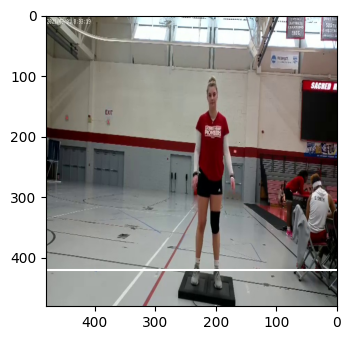

In [6]:
from matplotlib import pyplot as plt

df2 = pd.read_csv('Frontalkeypoints_new.csv')
# Using orient as records
df2 = df.to_dict('records')

#frames on jump
res = [d['image_name'] for d in df2 if((d['rightHeel'] > 350) and d['rightHeel'] < 420)]
print("================================================")
print("res::",(res))
lastframe = res.pop()
print("lastframe:",(lastframe))


framefetched = input(str("Enter frame name:"))


# Driver code   
df1 = pd.read_csv('Frontalkeypoints_new.csv')
name_list = df1['image_name'].tolist()
rightheel_list = (df1['rightHeelY'].tolist())
A = [int(rightheel_list) for rightheel_list in rightheel_list]
print(type(A[0]))
B = [(name_list) for name_list in name_list]
print(type(B[0]))

framelist = []
imagelist = []
res = None
c = 0
for frame,img in zip(A,B):
    if frame >= 400:
        c = c + 1
        framelist.append(frame)
        imagelist.append(img)
print("count", c)
# print("framelist:",framelist)
print("imagelist",imagelist)


framelist.clear()
imagelist.clear()

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("frontalimages/"+framefetched)

fig, ax = plt.subplots()
im = ax.imshow(im, extent=[480, 0, 480, 0])
plt.axhline(y = 420, color = 'white', linestyle = '-')
plt.show()


In [11]:
name_list.clear()
rightheel_list.clear()


In [12]:
name_list

[]